Chapter 23

# 距离度量
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码使用鸢尾花数据集，通过不同距离测量方法（欧氏距离、标准化欧氏距离和马氏距离）来可视化花萼长度和花瓣长度之间的关系，并在图中展示了协方差结构的几何特征。

1. **欧氏距离**：首先，以均值 \((\mu_x, \mu_y)\) 为中心，计算从样本点到中心点的欧氏距离，并绘制相应的等距轮廓线。欧氏距离计算公式为：
   $$
   d_{\text{Euclidean}} = \sqrt{(x - \mu_x)^2 + (y - \mu_y)^2}
   $$

2. **标准化欧氏距离**：对欧氏距离进行标准化，使距离的计算考虑了各变量的标准差。标准化后，每个方向上的尺度不同，展示了不同方差情况下的分布。标准化欧氏距离的公式为：
   $$
   d_{\text{Standardized Euclidean}} = \sqrt{\left(\frac{x - \mu_x}{\sigma_x}\right)^2 + \left(\frac{y - \mu_y}{\sigma_y}\right)^2}
   $$

3. **马氏距离**：通过协方差矩阵 \(\Sigma\) 对数据进行变换，计算马氏距离来度量不同方向上协方差的影响。马氏距离考虑了各特征的相关性，其公式为：
   $$
   d_{\text{Mahalanobis}} = \sqrt{(z - \mu)^T \Sigma^{-1} (z - \mu)}
   $$
   代码中计算了马氏距离的等值线，展示了在协方差影响下的样本分布特征。

通过这些距离测量的对比，可以清楚地观察数据在不同测量方式下的几何结构及协方差对分布形状的影响。

## 导入所需的库

In [1]:
import numpy as np  # 导入数值计算库
import matplotlib.pyplot as plt  # 导入绘图库
import pandas as pd  # 导入数据处理库
import seaborn as sns  # 导入数据可视化库
from sklearn.datasets import load_iris  # 导入数据集加载模块
from sklearn.covariance import EmpiricalCovariance, MinCovDet  # 导入协方差模块
from numpy import linalg as LA  # 导入线性代数模块

## 加载数据

In [2]:
iris_sns = sns.load_dataset("iris")  # 使用Seaborn加载iris数据集

SIGMA = iris_sns.iloc[:,:4].cov()  # 计算协方差矩阵
CORR = iris_sns.iloc[:,:4].corr()  # 计算相关系数矩阵
SIGMA = np.array(SIGMA)  # 转换为NumPy数组
CORR = np.array(CORR)  # 转换为NumPy数组

In [3]:
SIGMA_13 = SIGMA[[0, 2], :][:, [0, 2]]  # 提取sepal_length和petal_length的协方差
CORR_13 = CORR[[0, 2], :][:, [0, 2]]  # 提取相关系数
sigma_x = iris_sns['sepal_length'].std()  # 计算sepal_length的标准差
sigma_y = iris_sns['petal_length'].std()  # 计算petal_length的标准差
cov_xy = SIGMA_13[0, 1]  # 提取sepal_length和petal_length的协方差

In [4]:
mu_x = iris_sns['sepal_length'].mean()  # 计算sepal_length的均值
mu_y = iris_sns['petal_length'].mean()  # 计算petal_length的均值

In [5]:
x = np.linspace(3, 9, num=201)  # 生成x坐标数组
y = np.linspace(1, 7, num=201)  # 生成y坐标数组
xx, yy = np.meshgrid(x, y)  # 生成网格，用于绘制等高线

## 旋转网格生成函数

In [6]:
def generate_grid(V, mu_x, mu_y):
    """
    生成旋转后并平移的网格，返回两个网格坐标阵列。
    """
    x1_grid = np.arange(-10, 11, step=1)  # x1方向的网格点
    x2_grid = np.arange(-10, 11, step=1)  # x2方向的网格点
    
    XX1_grid, XX2_grid = np.meshgrid(x1_grid, x2_grid)  # 创建原始网格
    
    X_grid = np.column_stack((XX1_grid.ravel(), XX2_grid.ravel()))  # 将网格点平面展开
    
    Z_grid = X_grid @ V.T  # 旋转网格
    
    ZZ1_grid = Z_grid[:, 0].reshape((len(x1_grid), len(x2_grid)))  # 旋转后的x1坐标
    ZZ2_grid = Z_grid[:, 1].reshape((len(x1_grid), len(x2_grid)))  # 旋转后的x2坐标
    
    ZZ1_grid = ZZ1_grid + mu_x  # 平移x1方向
    ZZ2_grid = ZZ2_grid + mu_y  # 平移x2方向
    
    return ZZ1_grid, ZZ2_grid  # 返回旋转平移后的网格

## 欧氏距离可视化

In [7]:
I = np.array([[1, 0], [0, 1]])  # 单位矩阵，表示无旋转的网格
ZZ1_grid, ZZ2_grid = generate_grid(I, mu_x, mu_y)  # 生成无旋转的平移网格

x_array = np.array(iris_sns["sepal_length"])  # 提取sepal_length数据
y_array = np.array(iris_sns["petal_length"])  # 提取petal_length数据

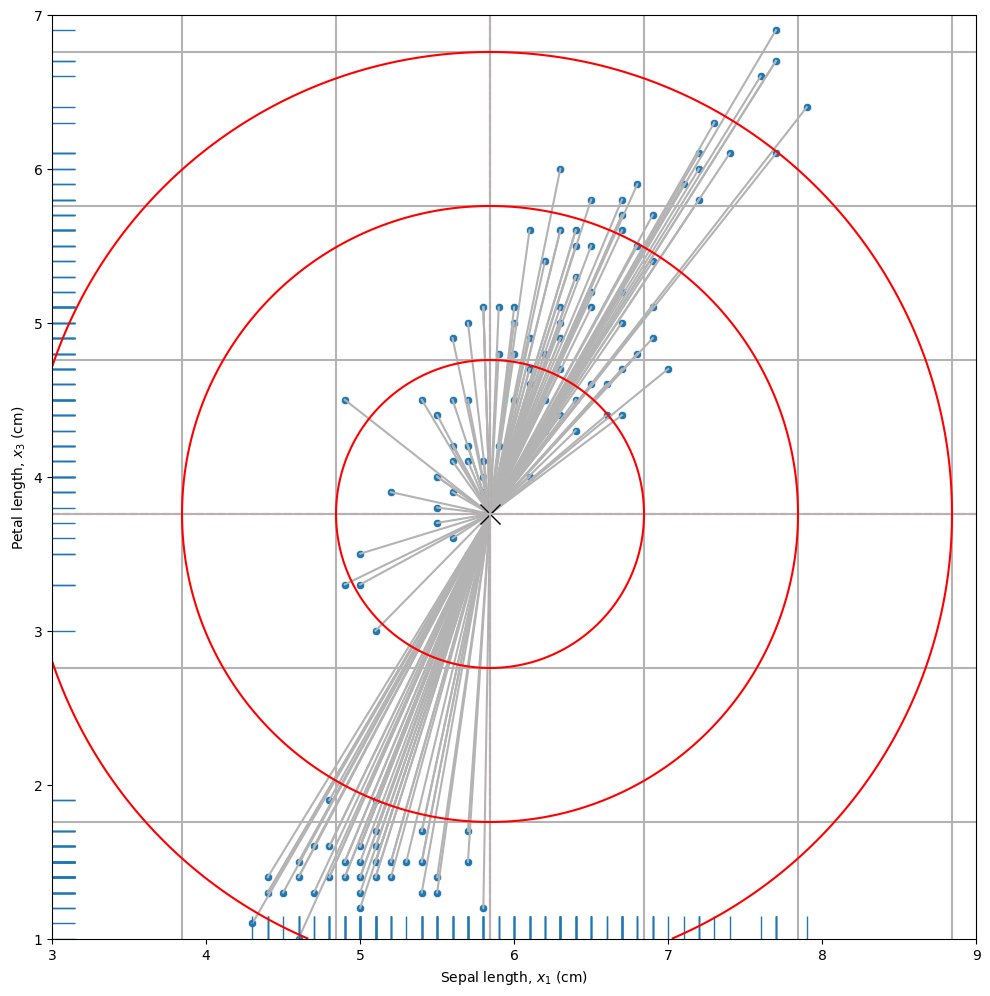

In [8]:
fig, ax = plt.subplots(figsize=(12, 12))  # 创建绘图窗口

plt.plot([x_array, mu_x + x_array * 0], [y_array, mu_y + y_array * 0], color=[0.7, 0.7, 0.7])  # 绘制数据到均值的连线

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")  # 绘制散点图
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax=ax)  # 绘制边际分布

plt.axvline(x=mu_x, linestyle='--', color='r')  # 绘制x方向均值线
plt.axhline(y=mu_y, linestyle='--', color='r')  # 绘制y方向均值线

plt.plot(mu_x, mu_y, color='k', marker='x', markersize=15)  # 绘制均值点

ax.set_xlabel('Sepal length, $x_1$ (cm)')  # 设置x轴标签
ax.set_ylabel('Petal length, $x_3$ (cm)')  # 设置y轴标签

plt.plot(ZZ1_grid, ZZ2_grid, color=[0.7, 0.7, 0.7])  # 绘制网格
plt.plot(ZZ1_grid.T, ZZ2_grid.T, color=[0.7, 0.7, 0.7])  # 绘制网格的转置

ax.axis('scaled')  # 等比例显示

ax.set_xbound(3, 9)  # 设置x轴范围
ax.set_ybound(1, 7)  # 设置y轴范围

dd = np.sqrt((xx - mu_x) ** 2 + (yy - mu_y) ** 2)  # 计算欧氏距离
ax.contour(xx, yy, dd, levels=[1, 2, 3], colors='r')  # 绘制等距线

## 标准化欧氏距离可视化

In [9]:
D = np.array([[sigma_x, 0], [0, sigma_y]])  # 标准差矩阵
ZZ1_grid, ZZ2_grid = generate_grid(D, mu_x, mu_y)  # 生成标准化网格

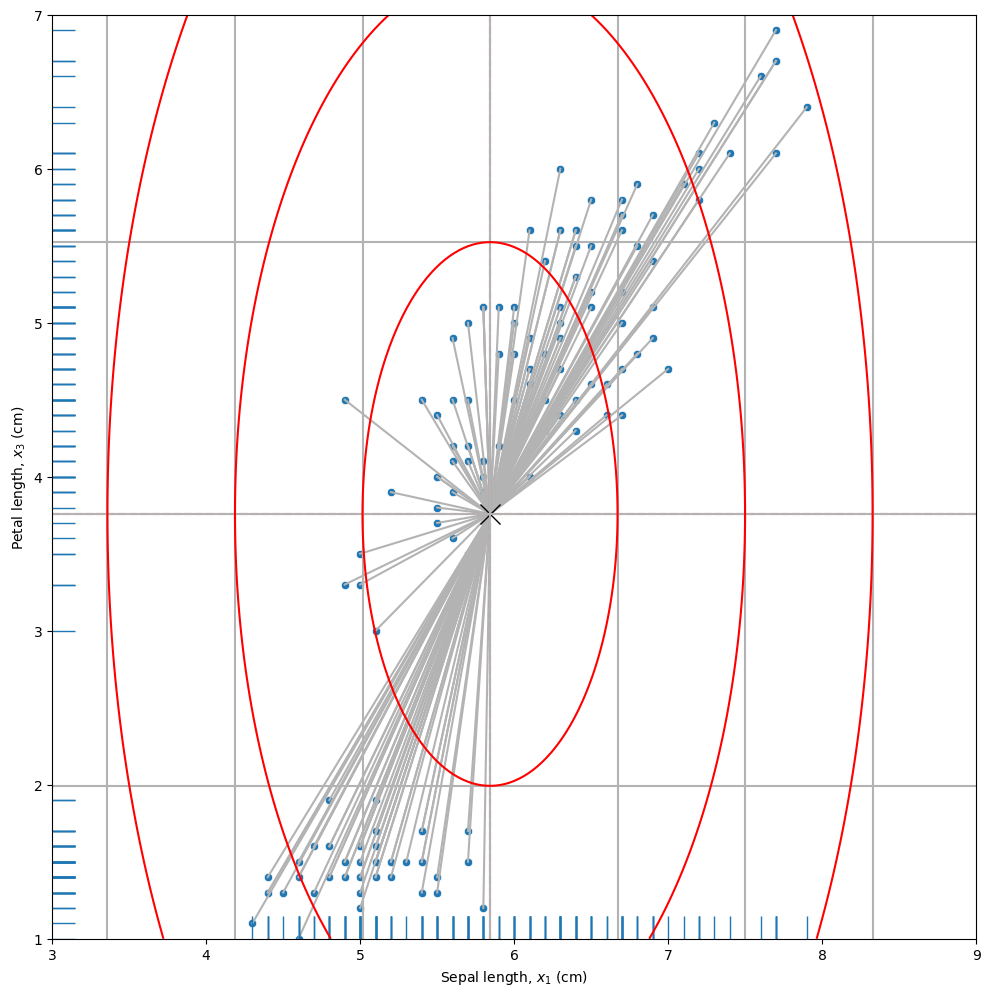

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))  # 创建新绘图窗口

plt.plot([x_array, mu_x + x_array * 0], [y_array, mu_y + y_array * 0], color=[0.7, 0.7, 0.7])  # 数据到均值连线

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")  # 绘制散点图
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax=ax)  # 边际分布

plt.axvline(x=mu_x, linestyle='--', color='r')  # x均值线
plt.axhline(y=mu_y, linestyle='--', color='r')  # y均值线

plt.plot(mu_x, mu_y, color='k', marker='x', markersize=15)  # 绘制均值点

ax.set_xlabel('Sepal length, $x_1$ (cm)')  # 设置x轴标签
ax.set_ylabel('Petal length, $x_3$ (cm)')  # 设置y轴标签

plt.plot(ZZ1_grid, ZZ2_grid, color=[0.7, 0.7, 0.7])  # 绘制网格
plt.plot(ZZ1_grid.T, ZZ2_grid.T, color=[0.7, 0.7, 0.7])  # 绘制网格的转置

ax.axis('scaled')  # 等比例显示
ax.set_xbound(3, 9)  # 设置x轴范围
ax.set_ybound(1, 7)  # 设置y轴范围

dd = np.sqrt(((xx - mu_x) / sigma_x) ** 2 + ((yy - mu_y) / sigma_y) ** 2)  # 标准化欧氏距离
ax.contour(xx, yy, dd, levels=[1, 2, 3], colors='r')  # 绘制等距线

## 马氏距离可视化

In [11]:
lambdas, V = LA.eig(SIGMA_13)  # 计算特征值和特征向量

zz_maha = np.c_[xx.ravel(), yy.ravel()]  # 将网格数据平面展开
X = iris_sns.to_numpy()  # 转换iris数据为NumPy数组
X13 = np.array(X[:, [0, 2]], dtype=float)  # 提取特定列
emp_cov_Xc = EmpiricalCovariance().fit(X13)  # 计算经验协方差

mahal_sq_Xc = emp_cov_Xc.mahalanobis(zz_maha)  # 计算马氏距离的平方

mahal_sq_Xc = mahal_sq_Xc.reshape(xx.shape)  # 重塑为网格形状
mahal_d_Xc = np.sqrt(mahal_sq_Xc)  # 计算马氏距离

ZZ1_grid, ZZ2_grid = generate_grid(V @ np.diag(np.sqrt(lambdas)), mu_x, mu_y)  # 生成马氏距离网格

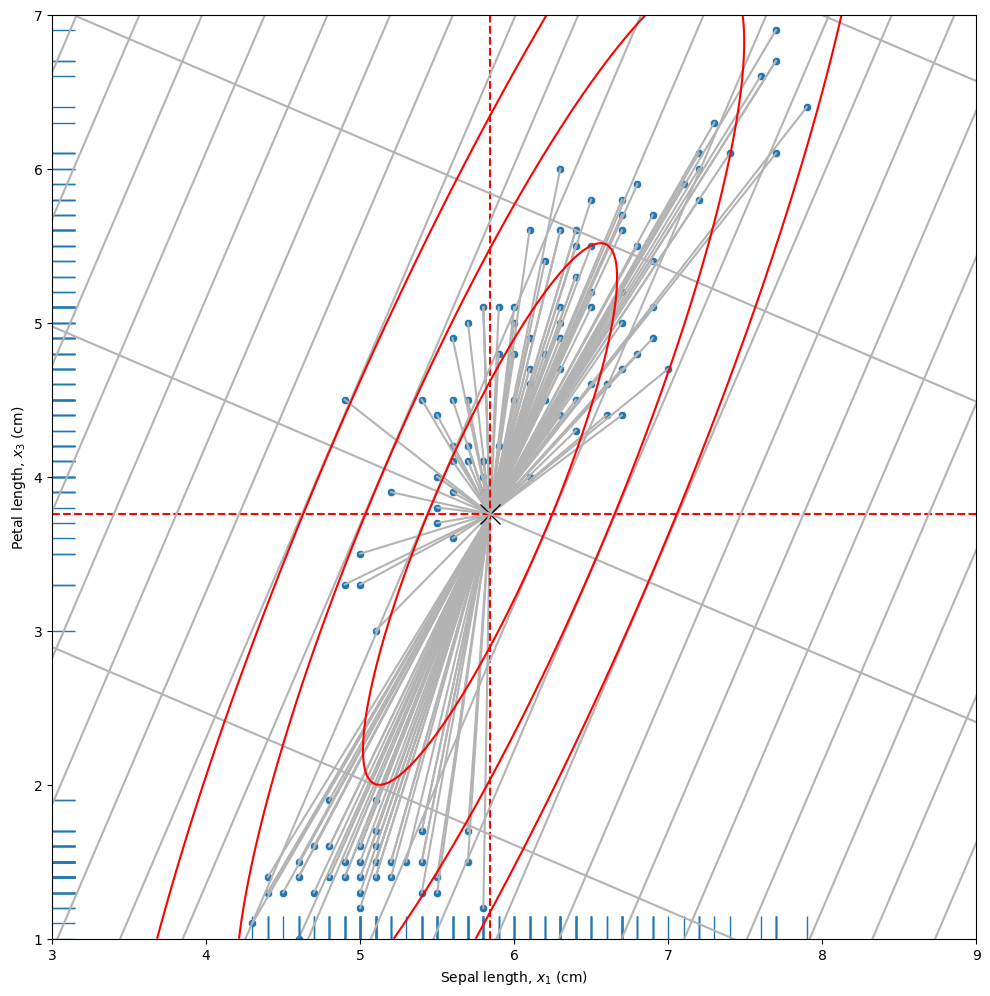

In [12]:
fig, ax = plt.subplots(figsize=(12, 12))  # 创建新绘图窗口

plt.plot([x_array, mu_x + x_array * 0], [y_array, mu_y + y_array * 0], color=[0.7, 0.7, 0.7])  # 数据连线

ax = sns.scatterplot(data=iris_sns, x="sepal_length", y="petal_length")  # 绘制散点图
sns.rugplot(data=iris_sns, x="sepal_length", y="petal_length", ax=ax)  # 边际分布

plt.axvline(x=mu_x, linestyle='--', color='r')  # x均值线
plt.axhline(y=mu_y, linestyle='--', color='r')  # y均值线

plt.plot(mu_x, mu_y, color='k', marker='x', markersize=15)  # 绘制均值点

ax.set_xlabel('Sepal length, $x_1$ (cm)')  # 设置x轴标签
ax.set_ylabel('Petal length, $x_3$ (cm)')  # 设置y轴标签

plt.plot(ZZ1_grid, ZZ2_grid, color=[0.7, 0.7, 0.7])  # 绘制网格
plt.plot(ZZ1_grid.T, ZZ2_grid.T, color=[0.7, 0.7, 0.7])  # 绘制网格的转置

ax.axis('scaled')  # 等比例显示
ax.set_xbound(3, 9)  # 设置x轴范围
ax.set_ybound(1, 7)  # 设置y轴范围

ax.contour(xx, yy, mahal_d_Xc, levels=[1, 2, 3], colors='r')  # 绘制马氏距离等距线